--- Analyse de la relation Taux / Risque / Durée ---
✅ Données et modèle neutre chargés.
Calcul des scores de risque en cours...
✅ Scores de risque neutres calculés.

Génération du graphique...


c:\Users\Pierre\Desktop\Projet Crédit pour tous\.venv\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


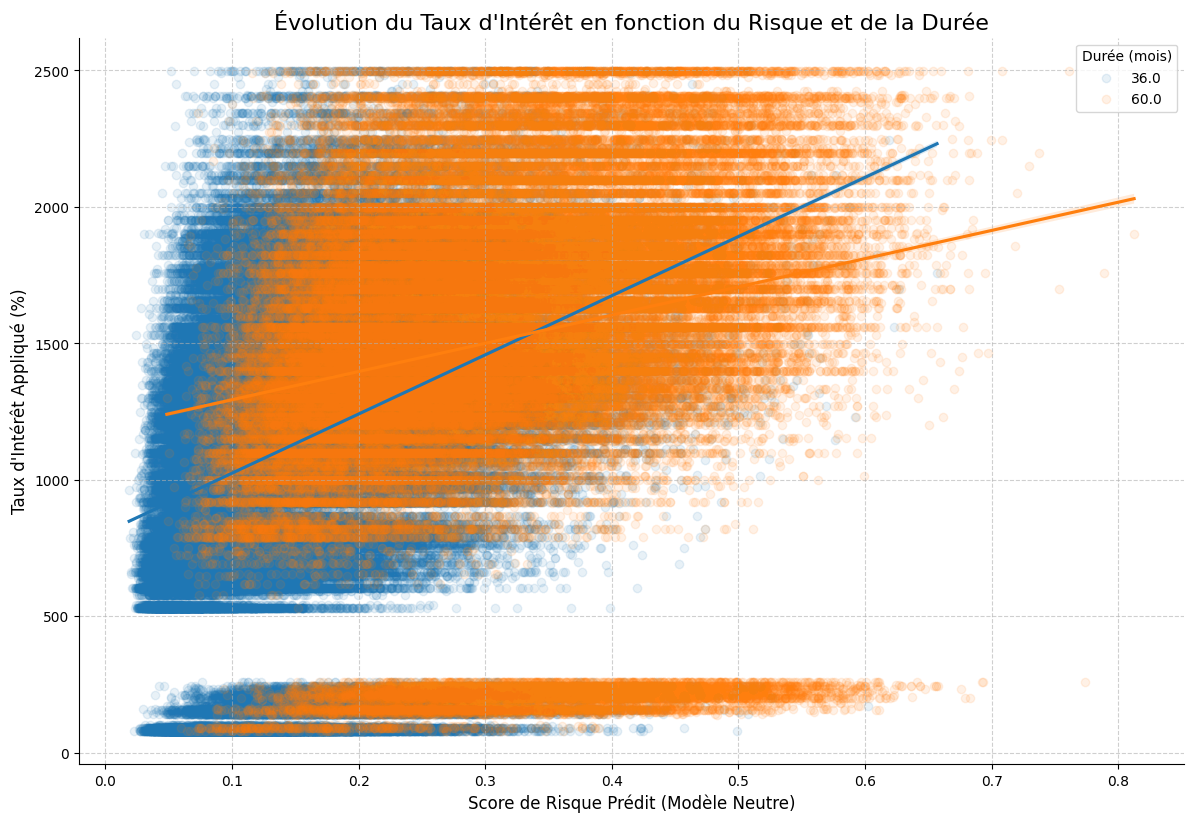

In [1]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Analyse de la relation Taux / Risque / Durée ---")

# --- 1. Chargement des données et du modèle de risque neutre ---
input_path = "../../data/processed/dataset_clean_no_outliers.parquet"
model_path = "../../models/step1_risk_model_NEUTRAL.pkl"
model_cols_path = "../../models/step1_risk_model_columns.pkl"

df = pd.read_parquet(input_path)
model_neutral = joblib.load(model_path)
model_columns = joblib.load(model_cols_path)
print("✅ Données et modèle neutre chargés.")

# --- 2. Calcul du score de risque pour toute la base ---
# On s'assure que le DataFrame a bien une colonne 'risk_score_neutral'
if 'risk_score_neutral' not in df.columns:
    print("Calcul des scores de risque en cours...")
    features_to_select = [
        'term', 'annual_inc', 'dti', 'revol_util', 'revol_bal', 'loan_amnt', 
        'emp_length', 'home_ownership', 'purpose', 'verification_status', 
        'mort_acc', 'pub_rec', 'open_acc', 'total_acc'
    ]
    X_full = df[features_to_select]
    X_full = pd.get_dummies(X_full, drop_first=True, dtype=float)
    X_full = X_full.reindex(columns=model_columns, fill_value=0)

    df['risk_score_neutral'] = model_neutral.predict_proba(X_full)[:, 1]
    print("✅ Scores de risque neutres calculés.")


# --- 3. Création du graphique de régression ---
# On multiplie par 100 pour une meilleure lisibilité
df['int_rate_percent'] = df['int_rate'] * 100

print("\nGénération du graphique...")

# lmplot est parfait pour visualiser une relation entre deux variables, 
# tout en la séparant par une troisième (la durée 'term').
sns.lmplot(
    data=df,
    x='risk_score_neutral',
    y='int_rate_percent',
    hue='term',  # Crée une ligne/couleur différente pour 36 et 60 mois
    height=8,
    aspect=1.5,
    legend_out=False,
    scatter_kws={'alpha':0.1} # Rend les points plus transparents pour voir la tendance
)

plt.title("Évolution du Taux d'Intérêt en fonction du Risque et de la Durée", fontsize=16)
plt.xlabel("Score de Risque Prédit (Modèle Neutre)", fontsize=12)
plt.ylabel("Taux d'Intérêt Appliqué (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Durée (mois)')
plt.show()

--- Analyse Croisée : Taux vs. Risque vs. Durée ---
✅ Données chargées.

Génération du graphique...


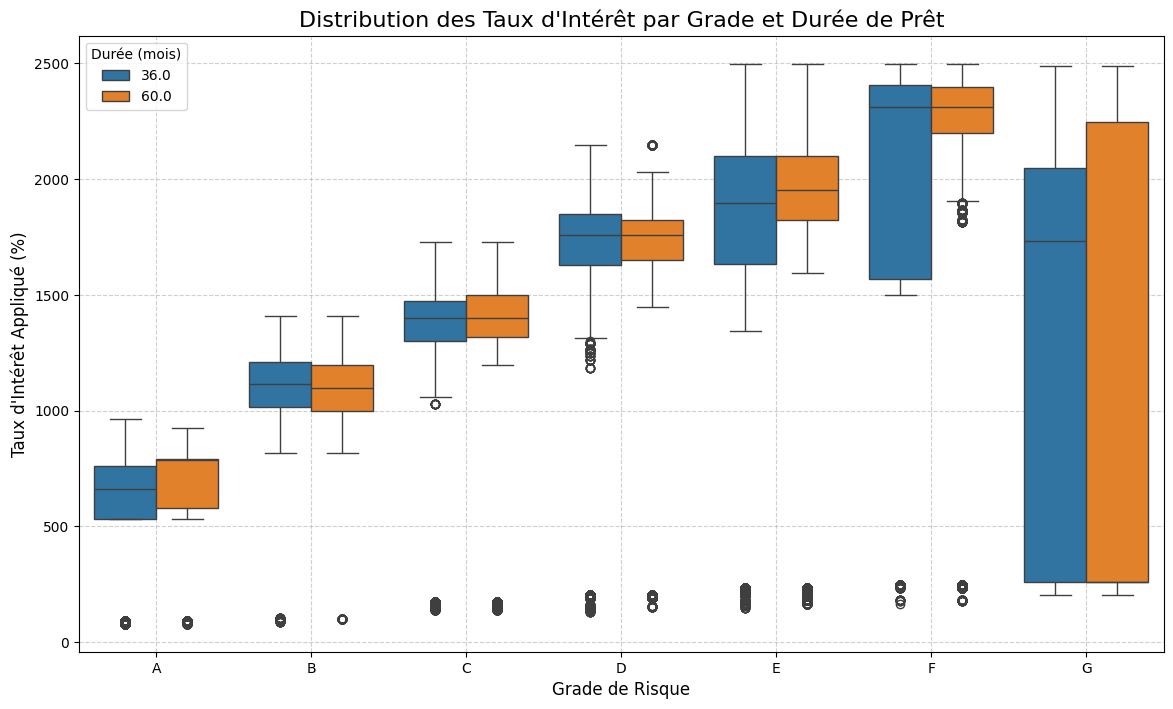

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Analyse Croisée : Taux vs. Risque vs. Durée ---")

# --- 1. Chargement des données ---
input_path = "../../data/processed/dataset_clean_no_outliers.parquet"
df = pd.read_parquet(input_path)

# On s'assure que les types sont corrects pour le graphique
df['term'] = df['term'].astype('category')
df['grade'] = df['grade'].astype('category')
df['int_rate_percent'] = df['int_rate'] * 100
print("✅ Données chargées.")

# --- 2. Création du Boxplot Détaillé ---
print("\nGénération du graphique...")
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df,
    x='grade',
    y='int_rate_percent',
    hue='term',  # La dimension supplémentaire : une couleur par durée
    order=['A', 'B', 'C', 'D', 'E', 'F', 'G'] # Pour assurer l'ordre logique des grades
)

plt.title("Distribution des Taux d'Intérêt par Grade et Durée de Prêt", fontsize=16)
plt.xlabel("Grade de Risque", fontsize=12)
plt.ylabel("Taux d'Intérêt Appliqué (%)", fontsize=12)
plt.legend(title='Durée (mois)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [6]:
input_path = "../../data/processed/dataset_clean_no_outliers.parquet"
df = pd.read_parquet(input_path)

# On calcule le taux médian pour chaque combinaison de grade et de durée
rate_grid = df.groupby(['grade', 'term'])['int_rate'].median().unstack()

print("--- Grille de Taux Médians Historiques ---")
display(rate_grid)

--- Grille de Taux Médians Historiques ---


term,36.0,60.0
grade,,
A,6.62,7.88
B,11.14,10.99
C,13.98,13.99
D,17.57,17.57
E,18.99,19.52
F,23.13,23.13
G,17.34,2.58
